In [1]:
import mcmc
import read_mcmc
from importlib import reload

# Log Likelihood
$\log{\mathcal{L}(\Theta)} = \sum_{v_c, v}(\hat{y}_{v_c,v}-y_{v_c,v})^2$  
$y = 4\pi v^2 f(v, v_c)$  
$\Theta = \langle D, e, H, j, k\rangle$

$f(v)=\frac{1}{N(v_0,v_\mathrm{damp})}\exp\left(-\frac{v^2}{v_0^{2}}\right)\mathcal{S}(v_\mathrm{damp}-v)$  
$\mathcal{S}(v_\mathrm{damp}-v)=\frac{1}{1+\exp(-k(v_\mathrm{damp}-v))}$  

$v_0=D\left(\frac{v_\mathrm{c}}{100\,\mathrm{km\,s^{-1}}}\right)^e$  
$v_\mathrm{damp}=H\left(\frac{v_\mathrm{c}}{100\,\mathrm{km\,s^{-1}}}\right)^j$

# Accidentally ran this on all m12s
Gaussian priors using the best estimates and covariance matrix from least squares minimization

burn-in: 102
thin: 24

samples shape: (4032, 5)
burn-in: 102
thin: 24

samples shape: (4032, 5)


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

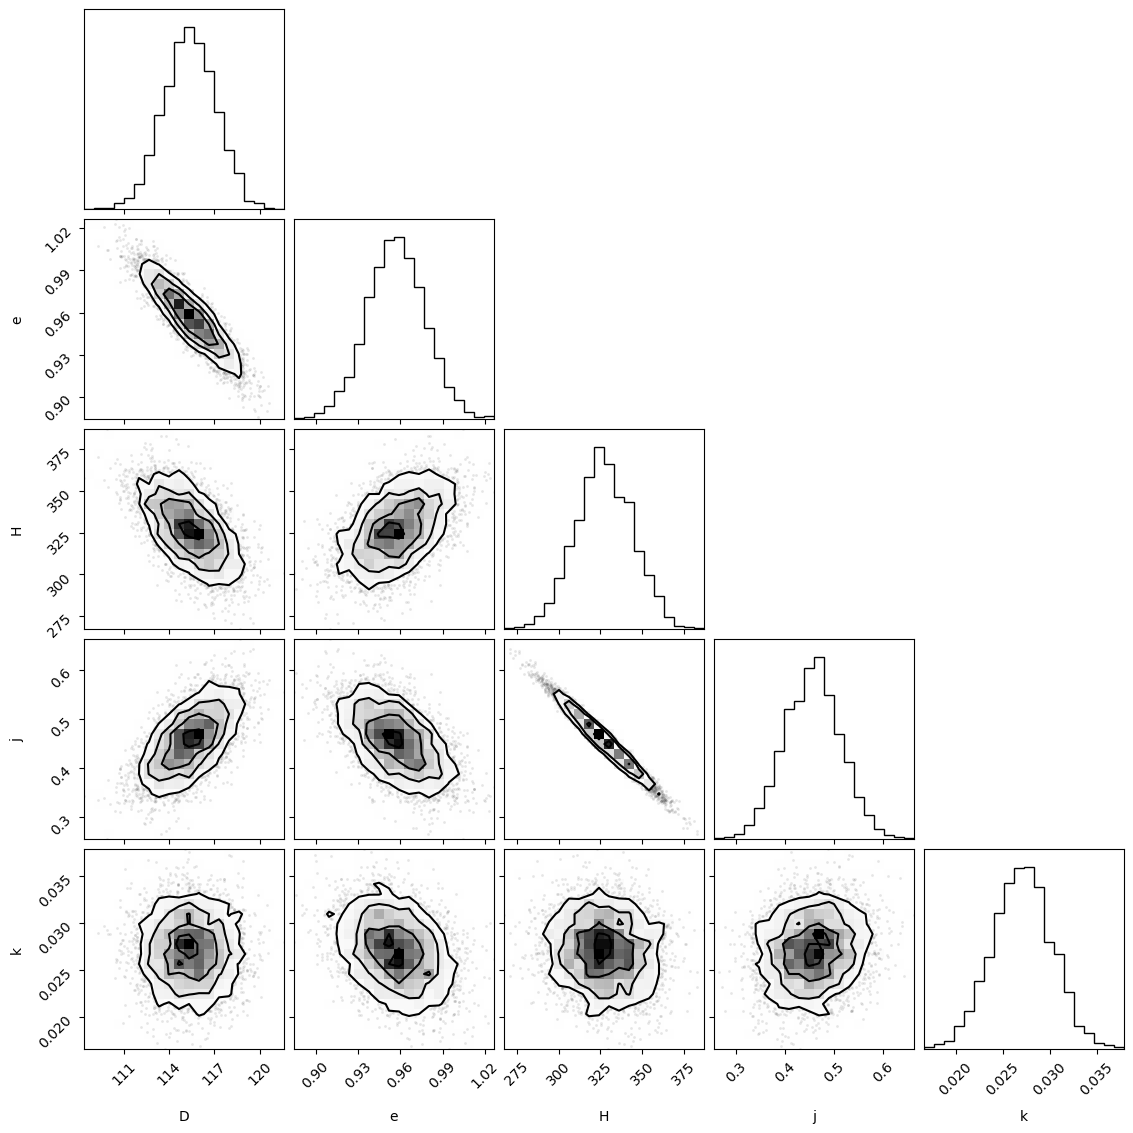

In [2]:
reload(read_mcmc)
read_mcmc.corner_plot('mcmc_samples.h5')
read_mcmc.estimate('mcmc_samples.h5')

# Now run only on disks
Also, I purposefully put the starting position in the wrong spot to check robustness

N/50 = 200;
tau: [136.0523969  114.85653509 219.78627971 231.92456078  58.07055529]


burn-in: 463
thin: 1

samples shape: (305184, 5)


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

N/50 = 200;
tau: [136.0523969  114.85653509 219.78627971 231.92456078  58.07055529]


burn-in: 463
thin: 1

samples shape: (305184, 5)


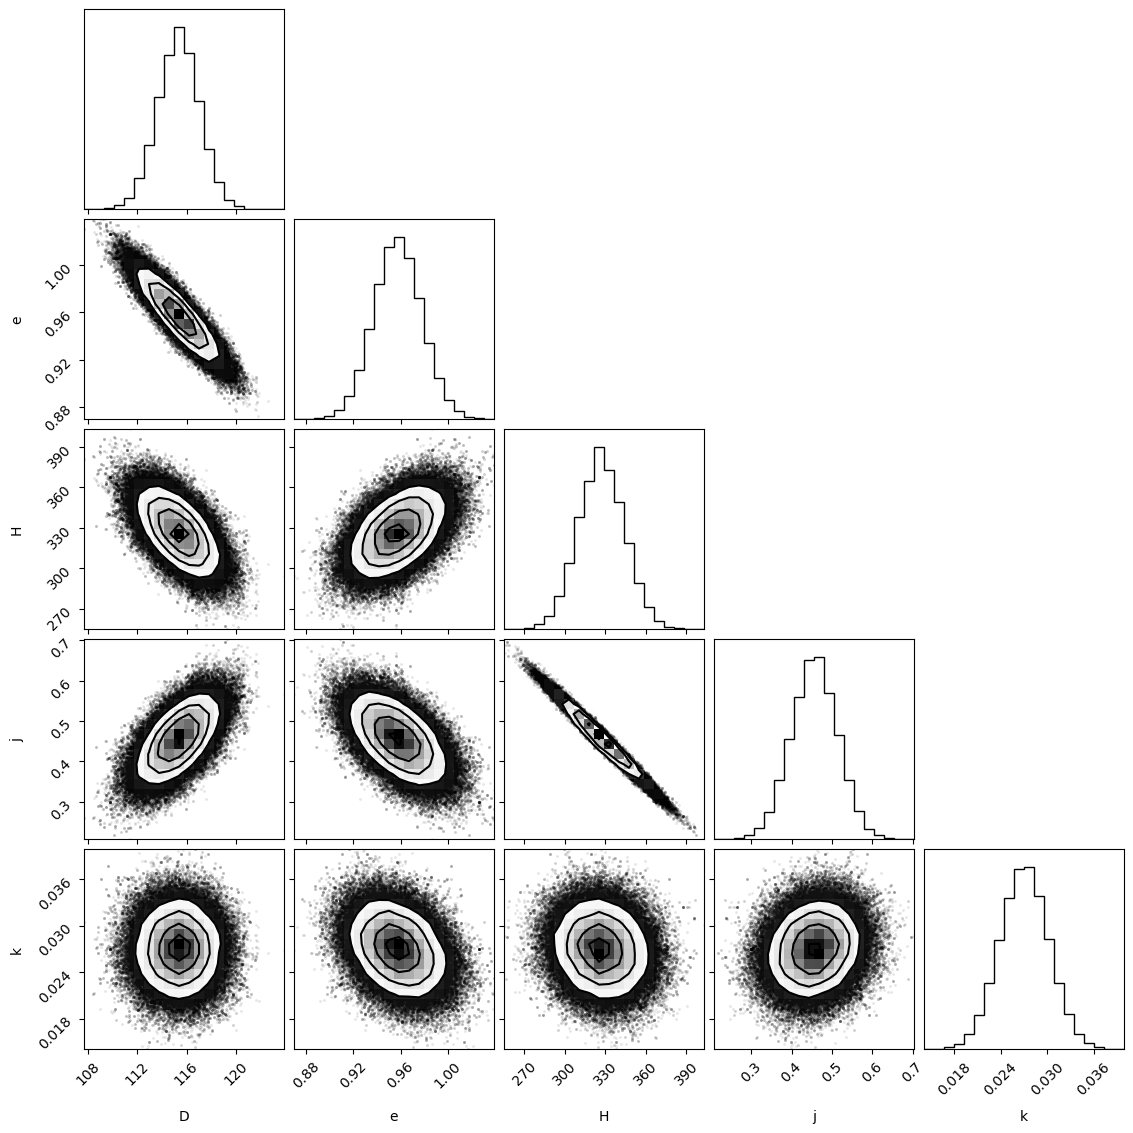

In [7]:
reload(read_mcmc)
read_mcmc.estimate('mcmc_samples_disks_gaussian_prior.h5')
read_mcmc.corner_plot('mcmc_samples_disks_gaussian_prior.h5')

## If I include pre-burn-in samples, we can see the algorithm finding the best estimate


samples shape: (160000, 5)


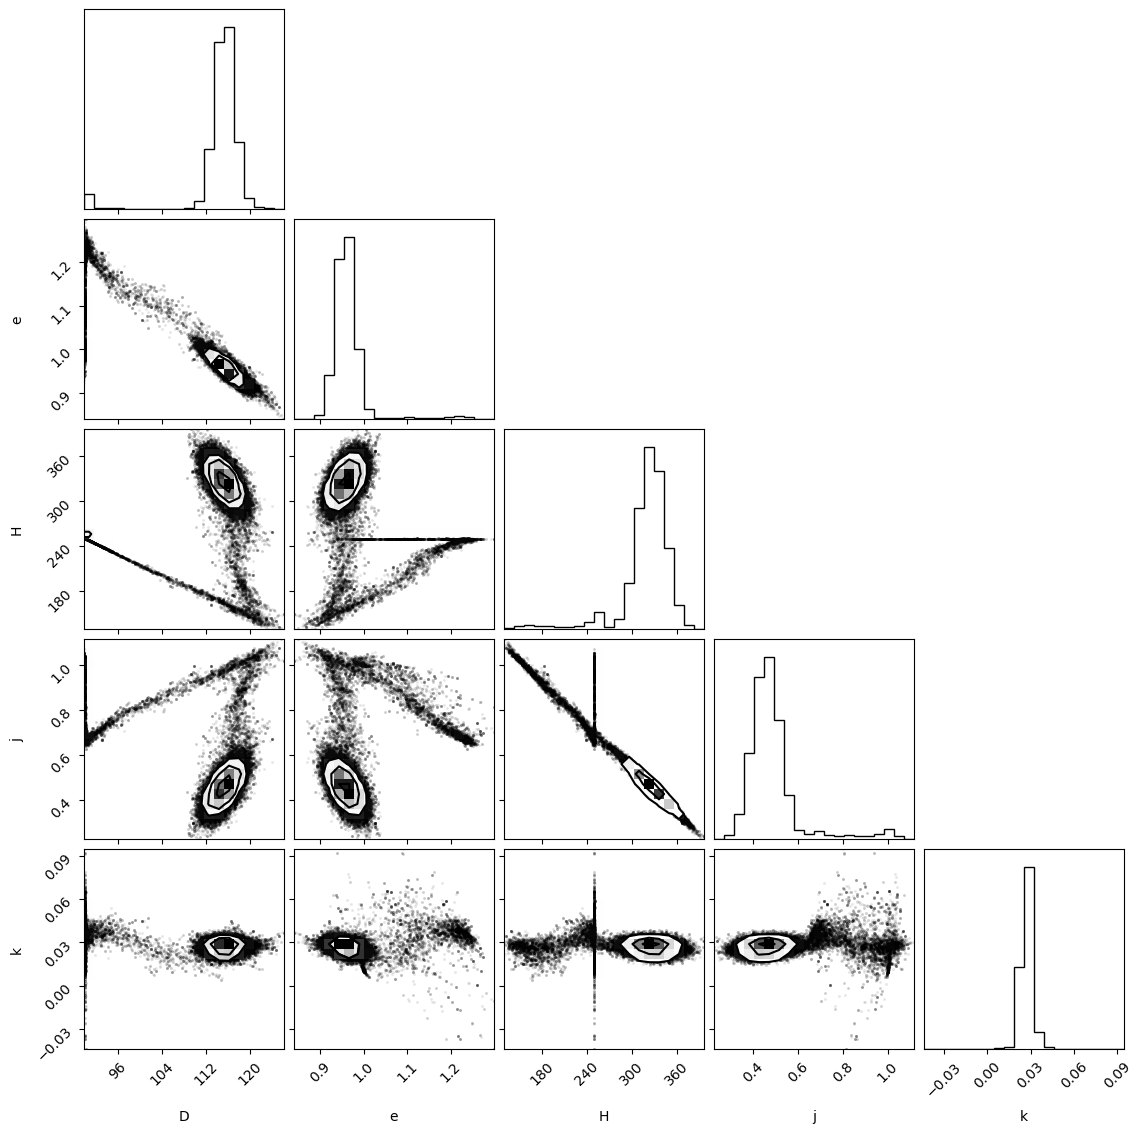

In [4]:
reload(read_mcmc)
read_mcmc.corner_plot('mcmc_samples_disks_gaussian_prior.h5', 
                      consider_burnin=False)

# Uniform priors

In [59]:
Xs = []
Xs.append([1,2,3])
print(Xs)
Xs.append([4,5,6])
print(Xs)

[[1, 2, 3]]
[[1, 2, 3], [4, 5, 6]]


In [43]:
import numpy as np
a = np.array([1,2,3])
a = np.insert(a, 1, 0)
print(a)

b = np.random.rand(4, 2)
print(b)
c = np.delete(b, 1, axis=0)
print(b)
print(c)

[1 0 2 3]
[[0.0258408  0.65678369]
 [0.99179334 0.98692684]
 [0.71643662 0.05453702]
 [0.65569978 0.22763871]]
[[0.0258408  0.65678369]
 [0.99179334 0.98692684]
 [0.71643662 0.05453702]
 [0.65569978 0.22763871]]
[[0.0258408  0.65678369]
 [0.71643662 0.05453702]
 [0.65569978 0.22763871]]


The chain is shorter than 50 times the integrated autocorrelation time for 5 parameter(s). Use this estimate with caution and run a longer chain!
N/50 = 84;
tau: [154.77383639 155.43386773 151.43763956 137.1532203  126.89151199]


burn-in: 310
thin: 1

samples shape: (124800, 5)


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

The chain is shorter than 50 times the integrated autocorrelation time for 5 parameter(s). Use this estimate with caution and run a longer chain!
N/50 = 84;
tau: [154.77383639 155.43386773 151.43763956 137.1532203  126.89151199]


burn-in: 310
thin: 1

samples shape: (124800, 5)


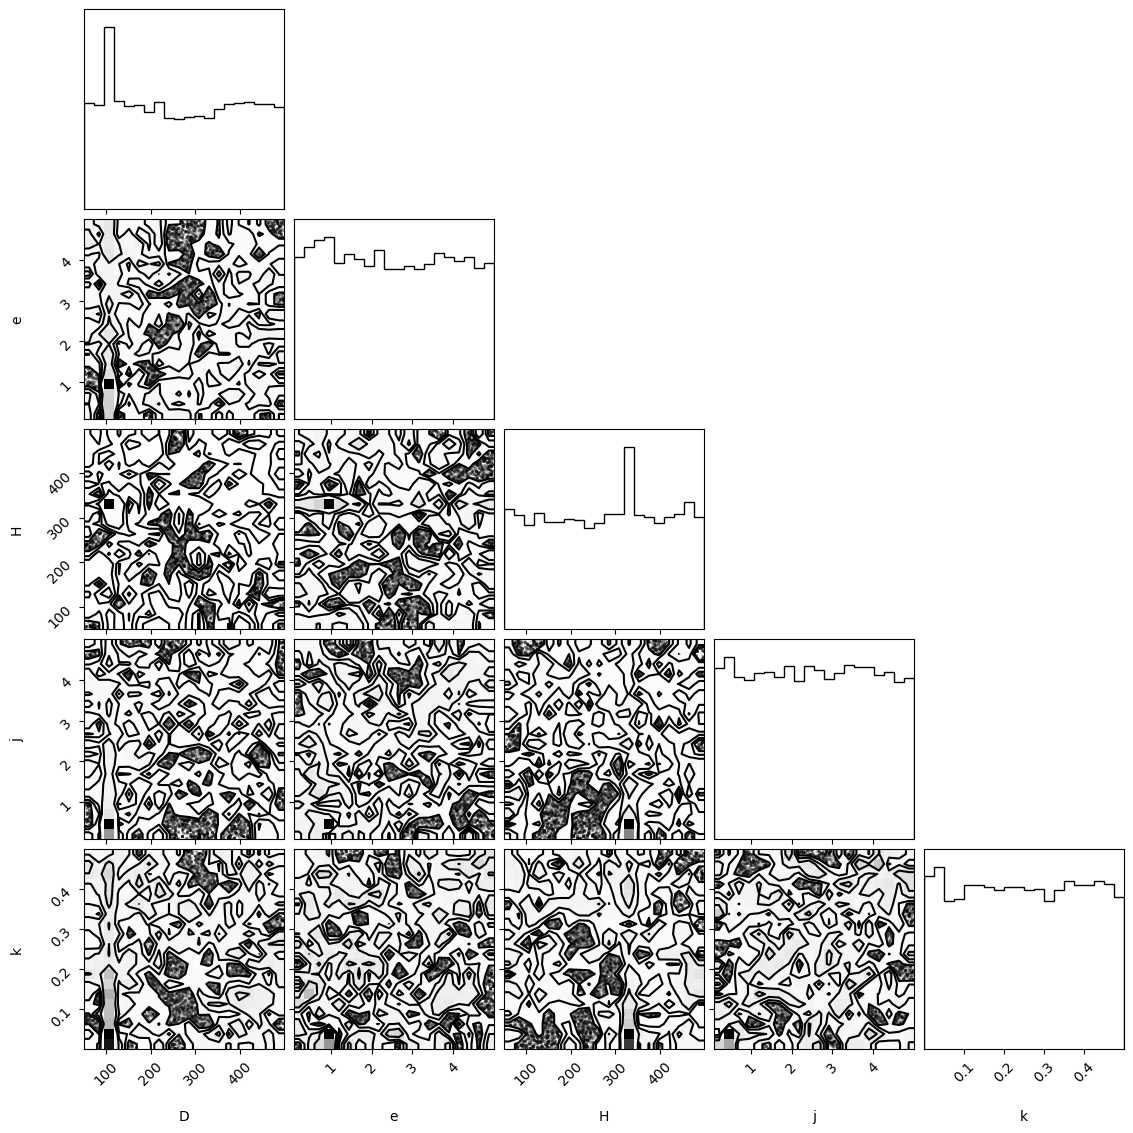

In [3]:
reload(read_mcmc)
read_mcmc.estimate('mcmc_samples_disks_uniform_prior_amended_likelihood.h5')
read_mcmc.corner_plot('mcmc_samples_disks_uniform_prior_amended_likelihood.h5', 
                      consider_burnin=True)

# Wide Gaussian prior

burn-in: 113
thin: 26

samples shape: (5984, 5)


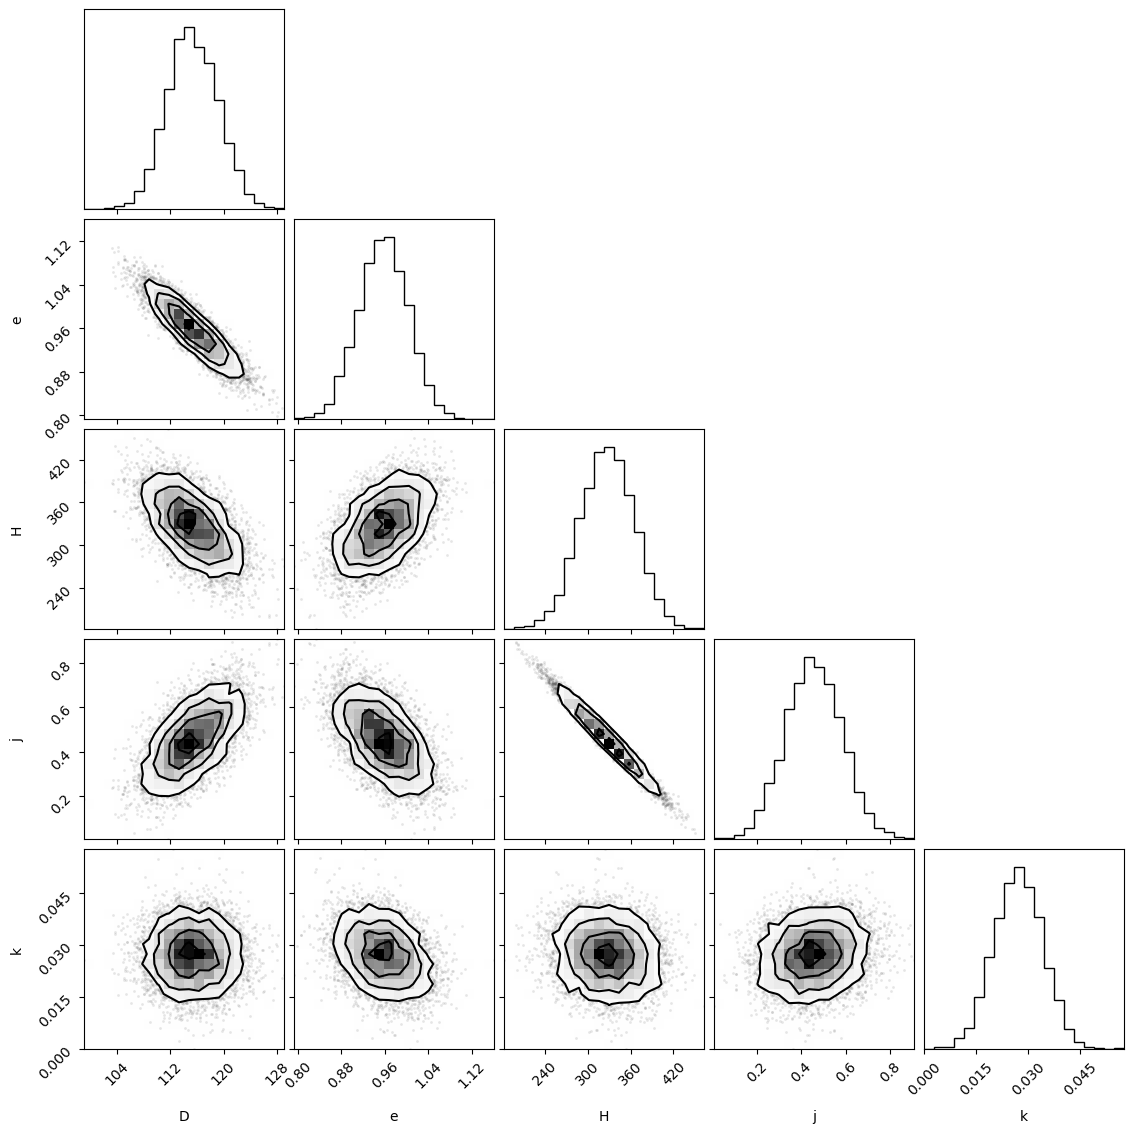

burn-in: 113
thin: 26

samples shape: (5984, 5)


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [8]:
read_mcmc.corner_plot('mcmc_samples_disks_wide_gaussian_prior.h5', 
                      consider_burnin=True)
read_mcmc.estimate('mcmc_samples_disks_wide_gaussian_prior.h5')

# Realized in my log likelihood, I wasn't summing the squared errors
I've now ammended that

In [ ]:
reload(read_mcmc)
read_mcmc.estimate(
    'mcmc_samples_disks_wide_gaussian_prior_amended_likelihood.h5'
)
read_mcmc.corner_plot(
    'mcmc_samples_disks_wide_gaussian_prior_amended_likelihood.h5', 
    consider_burnin=True,
    log_prior_function=mcmc.calc_log_gaussian_prior
)

burn-in: 109
thin: 21

samples shape: (5408, 5)


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

burn-in: 109
thin: 21

samples shape: (5408, 5)
